In [1]:
# Isohaline Transport Function Q(x,s,t) from TEF
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import TEF_Variables as tef

In [2]:
# Load fields
Qsg = 700
hs = 12
State = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/qf' + str(format(Qsg,'03d')) + '_rot/state_' + str(format(hs,'03d')) + '.nc')
Grid = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/qf' + str(format(Qsg,'03d')) + '_rot/grid_' + str(format(hs,'03d')) + '.nc')
# Confine to the range of fjord
state = State.isel(X=range(120), Xp1=range(121), Y=range(30,39), T=range(1,len(State.T)))
grid = Grid.isel(X=range(120), Xp1=range(121), Y=range(30,39))

ot = state.T.data # Ocean Time in seconds
x = grid.X.data

S = state.S.data # Salinity
U = (state.U.data[:,:,:,1:] + state.U.data[:,:,:,:-1]) / 2 # Along-channel velocity
drF = np.broadcast_to(grid.drF.data[np.newaxis, :, np.newaxis, np.newaxis], U.shape)
dyF = np.broadcast_to(grid.dyF.data[np.newaxis, np.newaxis, :, :], U.shape)
HFacC = np.broadcast_to(grid.HFacC.data[np.newaxis, :, :, :], U.shape)
DA = drF * dyF * HFacC # Cell area



In [74]:
xrange = np.arange(48,88)
NX = len(xrange)
sedges = np.linspace(0, 35, 1001) 
sbins = sedges[:-1] + np.diff(sedges)/2
NS = len(sedges)
NT = len(ot)

Qxs = np.zeros((NS,NX)) 
#xi = 50

for xi in range(NX):
    
    tef_q, tef_vel, tef_da, tef_qs, tef_qs2, sbins = tef.process_section(U,S,DA,ot,xi+xrange[0],23,testing=False)    

    # calculate Q(s) and Q_s(s), and etc.
    Qv=np.zeros((NT, NS))
    # Note that these are organized low s to high s, but still follow
    # the TEF formal definitions from MacCready (2011)
    Qv[:,:-1] = np.fliplr(np.cumsum(np.fliplr(tef_q), axis=1))
    Qxs[:,xi] = Qv[275:,:].mean(0)
    del Qv, tef_q, tef_vel, tef_da, tef_qs, tef_qs2

  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336
  time 0 out of 336


Text(0.5, 0, '$Q/(10^3\\;m^3/s)$')

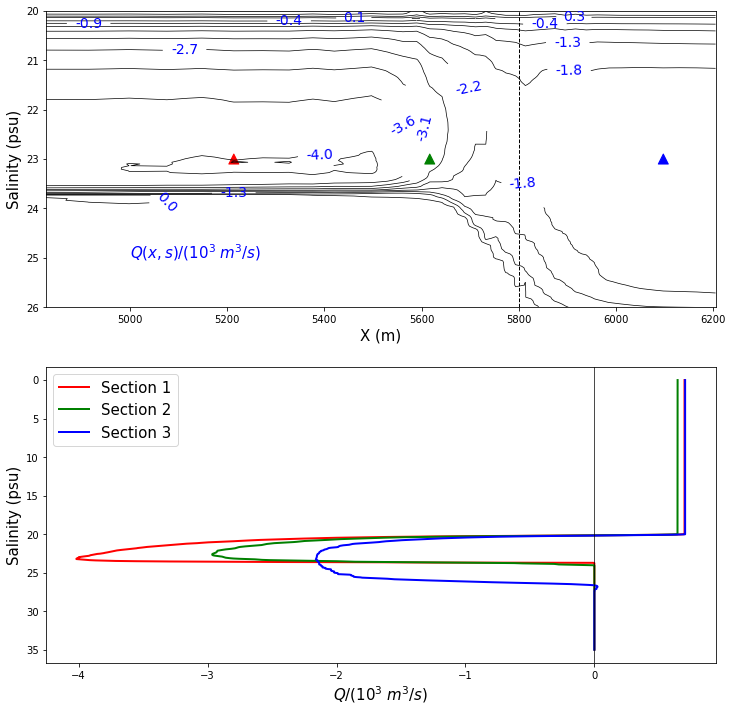

In [117]:
fig1 = plt.figure(figsize=(12,12))
fig1.tight_layout()
    

ax1 = fig1.add_subplot(211)
cs1 = np.linspace(-1,1,10)
cs2 = np.linspace(-4,0,10)
cmap = 'RdBu_r'
import matplotlib
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
CS1 = ax1.contour(x[xrange], sedges[:577], Qxs[:577,:]/1000, cs1, colors='k',linewidths=.7)
plt.clabel(CS1, fmt='%1.1f', fontsize=14, colors='b')
CS2 = ax1.contour(x[xrange], sedges[577:], Qxs[577:,:]/1000, cs2, colors='k',linewidths=.7)
plt.clabel(CS2, fmt='%1.1f', fontsize=14, colors='b')
#im1 = ax1.contourf(x[xrange], sedges, Qxs/1000, cs, cmap=cmap,extend='both')
#cbaxes = fig1.add_axes([0.75, .9, 0.15, 0.02])
#cbar = fig1.colorbar(im1,cax=cbaxes, orientation='horizontal')
#cbar.set_ticks([-4, -3, -2, -1, 0, 1])
#cbar.ax.set_title(r'Q(x,s) ($10^3\;m^3/s$)', size=12)

loc1, loc2, loc3 = 5, 15, 36
xloc = np.array([x[xrange[loc1]], x[xrange[loc2]], x[xrange[loc3]]])
yloc = np.array([23, 23, 23])
ax1.scatter(xloc, yloc, s=100, c=['r','g','b'], marker='^')
ax1.axvline(x=5800, color='k',lw=1,linestyle='--')

ax1.text(5000, 25, r'$Q(x,s)/(10^3\;m^3/s)$', fontsize=15, color='b')
ax1.set_ylim(20,26)
ax1.invert_yaxis()
ax1.set_ylabel(r'Salinity (psu)',size = 15)
ax1.set_xlabel(r'X (m)', size = 15)


ax2 = fig1.add_subplot(212)
ax2.plot(Qxs[:,loc1]/1e3,sedges,'r-',lw=2,label=r'Section 1')
ax2.plot(Qxs[:,loc2]/1e3,sedges,'g-',lw=2,label=r'Section 2')
ax2.plot(Qxs[:,loc3]/1e3,sedges,'b-',lw=2,label=r'Section 3')
#ax2.set_ylim(20,25)
ax2.axvline(x=0, color='k',lw=.7)
ax2.legend(loc='best', fontsize=15)
ax2.invert_yaxis()
#ax2.legend(loc='right', fontsize=15)
ax2.set_ylabel(r'Salinity (psu)',size = 15)
ax2.set_xlabel(r'$Q/(10^3\;m^3/s)$', size = 15)


In [5]:
Qxs.max(), Qxs.min()

(700.224212395241, -4069.6953407143124)

In [110]:
x[xrange[5]], x[xrange[15]], x[xrange[36]]

(5213.959041779475, 5616.81951336919, 6097.017236479451)

In [118]:
fig_path = "/Users/weiyangbao/Documents/Results_Figs/TEF/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

fig1.savefig(fig_path + '/Qxs.png', dpi=200, bbox_inches='tight')
#fig2.savefig(fig_path + '/Sections.png', dpi=200, bbox_inches='tight')
#fig3.savefig(fig_path + '/Sections.png', dpi=200, bbox_inches='tight')